In [1]:
#The Titanic Data Set
#Available at: https://www.kaggle.com/competitions/titanic/overview
#Build a predictive model that answers the question: 
#“what sorts of people were more likely to survive to the Titanic's sinking?” 
#using passenger data (ie name, age, gender, socio-economic class, etc).

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Reading the training dataset
train = pd.read_csv('titanic_train.csv')

In [5]:
#Reading the test dataset
test = pd.read_csv('titanic_test.csv')

In [6]:
#Concatenating the two dataframes
frames = [train, test]
Df = pd.concat(frames)

In [7]:
Df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
Df.shape

(1309, 12)

In [9]:
#Let's use seaborn to check where we are missing most of our data
#True if data is missing
#False if data is not missing
Df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,True,False,False,False,True,False,False,False,False,True,False
414,False,True,False,False,False,False,False,False,False,False,False,False
415,False,True,False,False,False,False,False,False,False,False,True,False
416,False,True,False,False,False,True,False,False,False,False,True,False


<Axes: >

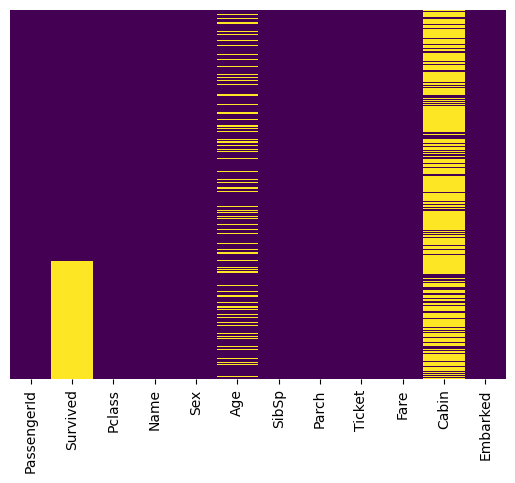

In [10]:
#Let's create a heatmap of those boolean values
sns.heatmap(Df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [11]:
#Note that we are missing information in the columns: Survived, Age, Cabin

#In the cabin column there is so much missing information
#We will just drop this column
Df.drop('Cabin', axis=1,inplace=True)

In [12]:
#Let's delete the rows where the information in missing in the column 'Survived'  

In [13]:
#Return the number of non-NA/null observations in the series Survived
Df['Survived'].count()

891

In [14]:
1309-891

418

In [15]:
#Deleting the last 418 rows of the dataframe
Df=Df.drop(Df.index[-1:-419:-1],axis=0,inplace=False)

<Axes: >

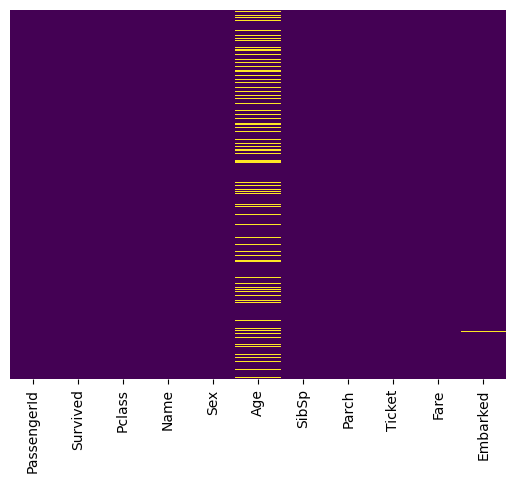

In [16]:
sns.heatmap(Df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [17]:
Df.shape

(473, 11)

In [18]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

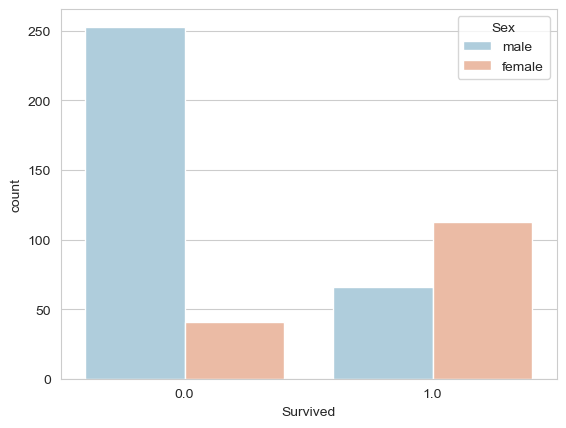

In [19]:
#Analysing the sex of the survivers:
sns.countplot(x='Survived', hue='Sex', data=Df,palette='RdBu_r')

In [20]:
#People that survived were, in the majority of the cases, female

<Axes: xlabel='Survived', ylabel='count'>

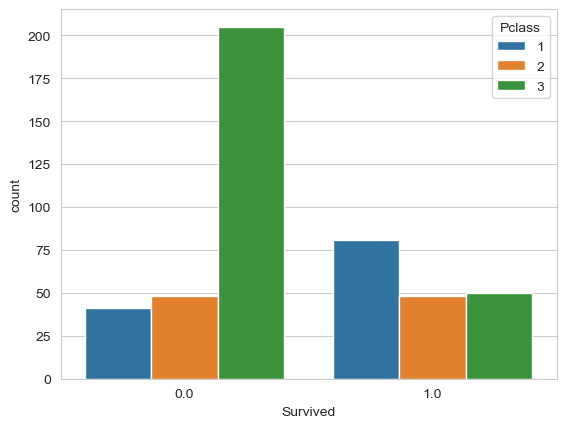

In [21]:
#Analysing the Class of the survivers:
sns.countplot(x='Survived', hue='Pclass', data=Df)

In [22]:
#The majority of people that didn't survive were from the 3º class

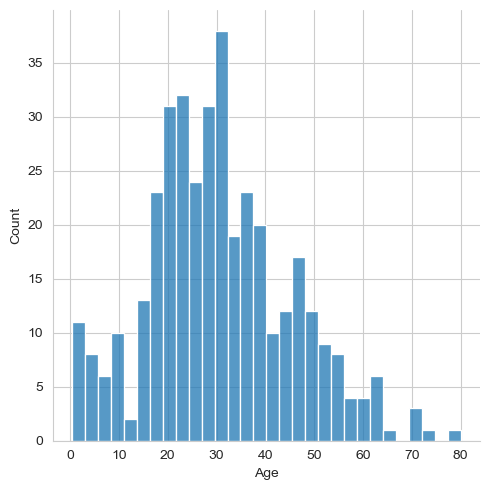

In [23]:
#Analysing the age of the passengers:
sns.displot(Df['Age'].dropna(), kde=False, bins=30)

<Axes: ylabel='Frequency'>

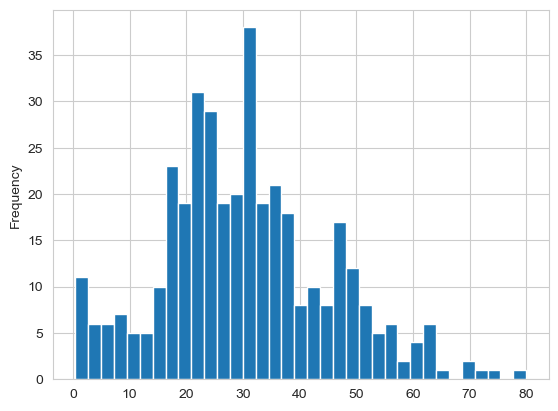

In [24]:
Df['Age'].plot.hist(bins=35)

In [25]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 418 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  473 non-null    int64  
 1   Survived     473 non-null    float64
 2   Pclass       473 non-null    int64  
 3   Name         473 non-null    object 
 4   Sex          473 non-null    object 
 5   Age          379 non-null    float64
 6   SibSp        473 non-null    int64  
 7   Parch        473 non-null    int64  
 8   Ticket       473 non-null    object 
 9   Fare         473 non-null    float64
 10  Embarked     472 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 44.3+ KB


<Axes: xlabel='SibSp', ylabel='count'>

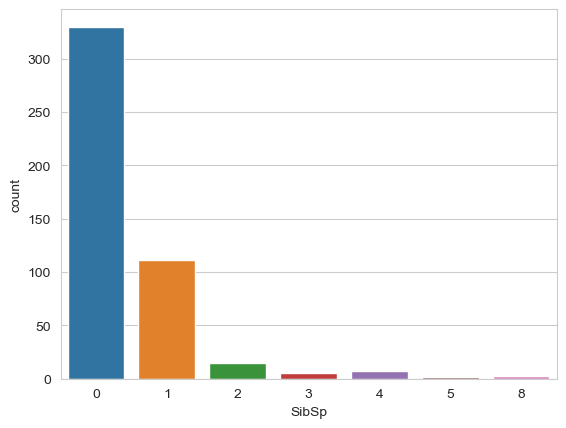

In [26]:
#Analysing the SibSp column
sns.countplot(x='SibSp', data=Df)

In [27]:
#Most people onboard did not bring neither a sibling or spouse 

<Axes: >

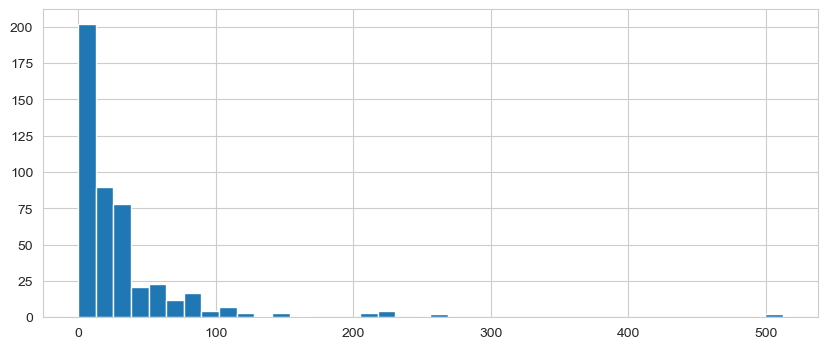

In [28]:
#Histogram of passenger's fare
Df['Fare'].hist(bins=40, figsize=(10,4))

In [29]:
import cufflinks as cf

In [30]:
cf.go_offline()#telling cufflinks we want operate offline

In [31]:
Df['Fare'].iplot(kind='hist',bins=30)

<Axes: xlabel='Pclass', ylabel='Age'>

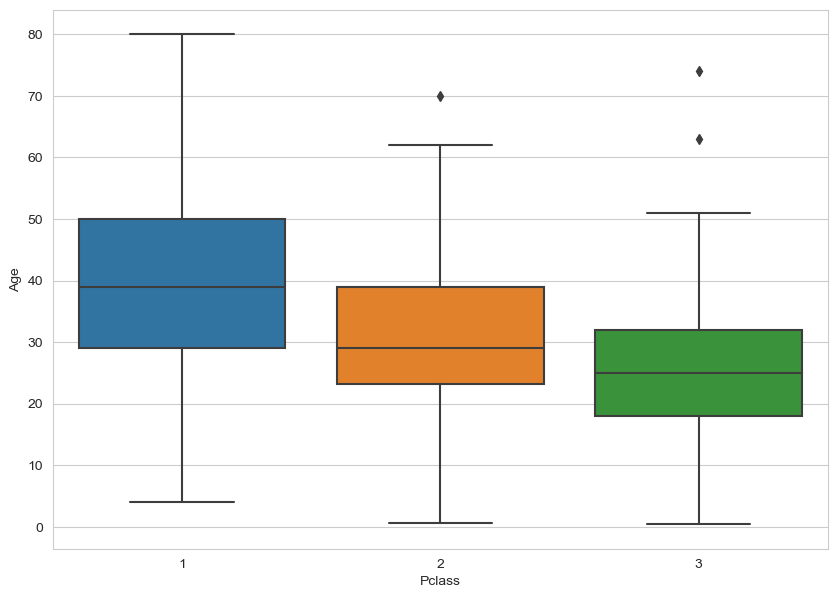

In [32]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=Df)

In [33]:
#Let's deal with the missing data in the table


In [34]:
#We will replace the missing data in the column 'Age' by the average value
#First class : 37
#Second class : 29
#Third class : 24 
def imput_age(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [35]:
Df['Age']=Df[['Age', 'Pclass']].apply(imput_age,axis=1)

<Axes: >

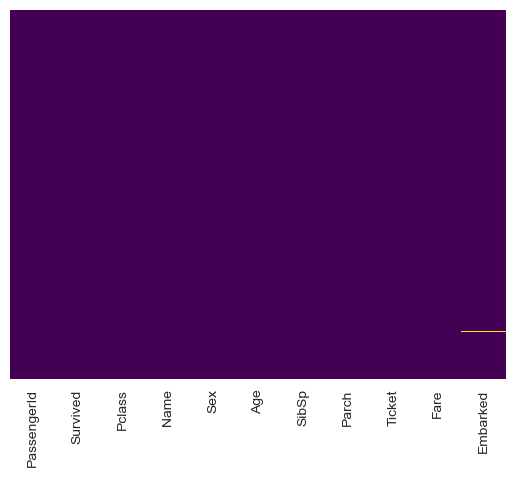

In [36]:
#Now, we have no missing information in the Age column
sns.heatmap(Df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [37]:
Df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
418,419,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,S
419,420,0.0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,S
420,421,0.0,3,"Gheorgheff, Mr. Stanio",male,24.0,0,0,349254,7.8958,C
421,422,0.0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,Q
422,423,0.0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,S


<Axes: >

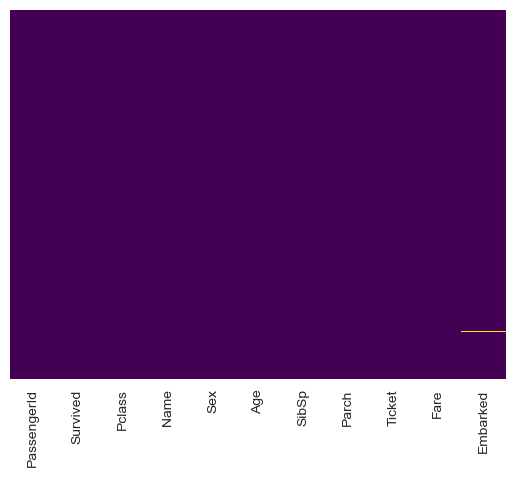

In [38]:
sns.heatmap(Df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [39]:
#Let's deal with categority features
#Lets convert cetagority features to numerical values using pandas

In [40]:
#Convert categorical variables into dumies
sex=pd.get_dummies(Df['Sex'], drop_first=True)

In [41]:
sex.head()

,male
418,1
419,0
420,1
421,1
422,1


In [42]:
embark=pd.get_dummies(Df['Embarked'], drop_first=True)

In [43]:
embark.head()

,Q,S
418,0,1
419,0,1
420,0,0
421,1,0
422,0,1


In [44]:
#Concatenation of the new columns to the datafrane
Df  = pd.concat([Df, sex, embark], axis=1)

In [45]:
Df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
418,419,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,S,1,0,1
419,420,0.0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,S,0,0,1
420,421,0.0,3,"Gheorgheff, Mr. Stanio",male,24.0,0,0,349254,7.8958,C,1,0,0
421,422,0.0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,Q,1,1,0
422,423,0.0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,S,1,0,1


In [46]:
#let's drop the columns we are not going to use
Df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [47]:
Df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
418,419,0.0,2,30.0,0,0,13.0000,1,0,1
419,420,0.0,3,10.0,0,2,24.1500,0,0,1
420,421,0.0,3,24.0,0,0,7.8958,1,0,0
421,422,0.0,3,21.0,0,0,7.7333,1,1,0
422,423,0.0,3,29.0,0,0,7.8750,1,0,1


In [48]:
Df.drop('PassengerId', axis=1, inplace=True)

In [49]:
Df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
418,0.0,2,30.0,0,0,13.0000,1,0,1
419,0.0,3,10.0,0,2,24.1500,0,0,1
420,0.0,3,24.0,0,0,7.8958,1,0,0
421,0.0,3,21.0,0,0,7.7333,1,1,0
422,0.0,3,29.0,0,0,7.8750,1,0,1


In [50]:
#Constructing a logistic regression model
X=Df.drop('Survived', axis=1)
y = Df['Survived']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel = LogisticRegression(max_iter=1000)

In [55]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [56]:
predictions=logmodel.predict(X_test)

In [58]:
predictions

array([1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 0.])

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        86
         1.0       0.80      0.64      0.71        56

    accuracy                           0.80       142
   macro avg       0.80      0.77      0.78       142
weighted avg       0.80      0.80      0.79       142



In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_test, predictions)

array([[77,  9],
       [20, 36]], dtype=int64)

In [63]:
#Confusion matrix
#TP=77    FP=9
#FN=20    TN=36

In [64]:
len(predictions)

142

In [65]:
#Error rate of the model:
(20+9)/142

0.20422535211267606